In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145714&authkey=ACWhFouJ6_327I8"

--2019-05-10 07:20:11--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145714&authkey=ACWhFouJ6_327I8
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kmowyq.am.files.1drv.com/y4mpkyUqU02bq73TOx_lQ4VP4YB53PahUxghWfbiMxU1nrZir-6M-Af1Y3zEYyTTGOiscMoG9I84iNyfyO--ycNSi4EjqgUEFHfg1wk0UmkGlHP7XGVyvVL-I8yTZrpYEStqLroLN40B3Gpt1THtjzLJx23qGSZUGBvs7lg_KJI4keYmAhtie4joVWrawLus1mVlUhkap1xDJINBZti0TUSVA/PUC_UFPR05_04_50_50.zip?download&psid=1 [following]
--2019-05-10 07:20:12--  https://kmowyq.am.files.1drv.com/y4mpkyUqU02bq73TOx_lQ4VP4YB53PahUxghWfbiMxU1nrZir-6M-Af1Y3zEYyTTGOiscMoG9I84iNyfyO--ycNSi4EjqgUEFHfg1wk0UmkGlHP7XGVyvVL-I8yTZrpYEStqLroLN40B3Gpt1THtjzLJx23qGSZUGBvs7lg_KJI4keYmAhtie4joVWrawLus1mVlUhkap1xDJINBZti0TUSVA/PUC_UFPR05_04_50_50.zip?download&psid=1
Resolving kmowyq.am.files.1drv.com (k

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45714&authkey=ACWhFouJ6_327I8"

In [0]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os


data_dir = './PUC_UFPR05_04_50_50'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(60, 60, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                43280     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total para

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)



test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=2048,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(60, 60),
        batch_size=2048,
        class_mode='binary'
        )

Found 347924 images belonging to 2 classes.
Found 347927 images belonging to 2 classes.


In [0]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=169, 
                              epochs=5,
                              validation_data=validation_generator,
                              validation_steps=169, 
                              
                             )

Epoch 1/5
169/169 [==============================] - 491s 3s/step - loss: 0.0048 - acc: 0.9992 - val_loss: 0.0066 - val_acc: 0.9989
Epoch 2/5
  1/169 [..............................] - ETA: 30s - loss: 0.0038 - acc: 0.9995

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.168945). Check your callbacks.
  % delta_t_median)


169/169 [==============================] - 475s 3s/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.0066 - val_acc: 0.9989
Epoch 3/5
169/169 [==============================] - 473s 3s/step - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0062 - val_acc: 0.9990
Epoch 4/5
169/169 [==============================] - 476s 3s/step - loss: 0.0043 - acc: 0.9992 - val_loss: 0.0071 - val_acc: 0.9988
Epoch 5/5
169/169 [==============================] - 472s 3s/step - loss: 0.0041 - acc: 0.9993 - val_loss: 0.0066 - val_acc: 0.9989


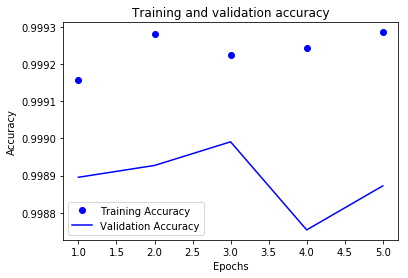

In [0]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-10 12:59:27--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.43.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.43.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4mKZ8tlYg3UwVqshdz1SBVtStvfexzqFqTQ9QnJUIVgUKTAaTbU9a0SzCFy08VD9BHDzPgCnmzF1OwGe1hC7whkXIFNR90q7u-g7Y9hIh_Himpz1k6rs6ksH6gGp_Ow7BbJwvtWYJu2oHgM9OYMW6L66a_kE2VGKPgx1ciop-JqJztaPv_JIaGrfpT8wt-Tpi7RkKE6xSysDWW2Yy3qmgtzA/CNR_TEST.zip?download&psid=1 [following]
--2019-05-10 12:59:28--  https://mwrg1q.am.files.1drv.com/y4mKZ8tlYg3UwVqshdz1SBVtStvfexzqFqTQ9QnJUIVgUKTAaTbU9a0SzCFy08VD9BHDzPgCnmzF1OwGe1hC7whkXIFNR90q7u-g7Y9hIh_Himpz1k6rs6ksH6gGp_Ow7BbJwvtWYJu2oHgM9OYMW6L66a_kE2VGKPgx1ciop-JqJztaPv_JIaGrfpT8wt-Tpi7RkKE6xSysDWW2Yy3qmgtzA/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [0]:
temp = os.path.join("./CNR", 'test')

test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )


model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.4813853219151497, 0.8832500100135803]